In [ ]:
# Importando Tweets

In [1]:
import pandas as pd

In [2]:
import json

In [3]:
import csv

In [4]:
import re

In [5]:
import tweepy

In [6]:
import logging

In [7]:
logger = logging.getLogger()

In [8]:
ACCESS_TOKEN = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
ACCESS_TOKEN_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
CONSUMER_KEY = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
CONSUMER_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

In [9]:
# Pegar trends

In [10]:
def create_api():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
    except Exception as e:
        logger.error("Error creating API", exc_info=True)
        raise e
    logger.info("API created")
    return api 

In [11]:
auth = tweepy.OAuthHandler(consumer_key=CONSUMER_KEY, consumer_secret=CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

In [12]:
api = create_api()

In [19]:
from typing import Any, Dict, List

In [20]:
import time

In [21]:
BRAZIL_WOE_ID = 23424768

In [22]:
# def _get_trends(woe_id: int, api: tweepy.API) -> List[Dict[str, Any]]: 
#     woe_id= BRAZIL_WOE_ID
#     trends = api.get_place_trends(woe_id)
#     return trends[0]["trends"]

In [23]:
def save_trends() -> None:
    api = create_api()
    trends = api.get_place_trends(BRAZIL_WOE_ID)
    return trends[0]["trends"]

In [24]:
trends = save_trends()

In [25]:
print(trends)

[{'name': '#GRAMMYs', 'url': 'http://twitter.com/search?q=%23GRAMMYs', 'promoted_content': None, 'query': '%23GRAMMYs', 'tweet_volume': 149278}, {'name': 'jaemin', 'url': 'http://twitter.com/search?q=jaemin', 'promoted_content': None, 'query': 'jaemin', 'tweet_volume': 148406}, {'name': '#DontLetItBreakYourHeart', 'url': 'http://twitter.com/search?q=%23DontLetItBreakYourHeart', 'promoted_content': None, 'query': '%23DontLetItBreakYourHeart', 'tweet_volume': 61618}, {'name': 'Sousa', 'url': 'http://twitter.com/search?q=Sousa', 'promoted_content': None, 'query': 'Sousa', 'tweet_volume': None}, {'name': '#LouisTomlinson', 'url': 'http://twitter.com/search?q=%23LouisTomlinson', 'promoted_content': None, 'query': '%23LouisTomlinson', 'tweet_volume': 62512}, {'name': 'Nicarágua', 'url': 'http://twitter.com/search?q=Nicar%C3%A1gua', 'promoted_content': None, 'query': 'Nicar%C3%A1gua', 'tweet_volume': 37369}, {'name': 'Gorillaz', 'url': 'http://twitter.com/search?q=Gorillaz', 'promoted_content

In [26]:
print(trends[0])

{'name': '#GRAMMYs', 'url': 'http://twitter.com/search?q=%23GRAMMYs', 'promoted_content': None, 'query': '%23GRAMMYs', 'tweet_volume': 149278}


In [57]:
marca = 'Netflix'
        
for s in range(len(trends)):
    if trends[s]["name"] == marca:
        print('sim')

In [ ]:
marca = 'Netflix'
        
for s in range(len(trends)):
    if trends[s]["name"] == marca:
        ver = pegar_tweets(hashtag_phrase, api= api)

In [27]:
trends

[{'name': '#GRAMMYs',
  'url': 'http://twitter.com/search?q=%23GRAMMYs',
  'promoted_content': None,
  'query': '%23GRAMMYs',
  'tweet_volume': 149278},
 {'name': 'jaemin',
  'url': 'http://twitter.com/search?q=jaemin',
  'promoted_content': None,
  'query': 'jaemin',
  'tweet_volume': 148406},
 {'name': '#DontLetItBreakYourHeart',
  'url': 'http://twitter.com/search?q=%23DontLetItBreakYourHeart',
  'promoted_content': None,
  'query': '%23DontLetItBreakYourHeart',
  'tweet_volume': 61618},
 {'name': 'Sousa',
  'url': 'http://twitter.com/search?q=Sousa',
  'promoted_content': None,
  'query': 'Sousa',
  'tweet_volume': None},
 {'name': '#LouisTomlinson',
  'url': 'http://twitter.com/search?q=%23LouisTomlinson',
  'promoted_content': None,
  'query': '%23LouisTomlinson',
  'tweet_volume': 62512},
 {'name': 'Nicarágua',
  'url': 'http://twitter.com/search?q=Nicar%C3%A1gua',
  'promoted_content': None,
  'query': 'Nicar%C3%A1gua',
  'tweet_volume': 37369},
 {'name': 'Gorillaz',
  'url': '

In [ ]:
# Salvar tweets em formato CSV

In [13]:
#encoding: utf-8
def pegar_tweets( hashtag_phrase, api: tweepy.API):
  
    #get the name of the spreadsheet we will write to
    fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))

    #open the spreadsheet we will write to
    with open('%s.csv' % (fname), 'w', encoding="utf-8") as file:

        
        w = csv.writer(file)

        #write header row to spreadsheet
        w.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'followers_count'])

        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        #for tweet in tweepy.Cursor(api.get_oembed, q=hashtag_phrase+' -filter:retweets', \
        #                           lang="br", tweet_mode='extended').items(50):
        for tweet in tweepy.Cursor(api.search_tweets, q=hashtag_phrase+' -filter:retweets', tweet_mode='extended', result_type='mixed', lang='pt').items(50):
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' '), tweet.user.screen_name, [e['text'] for e in tweet._json['entities']['hashtags']], tweet.user.followers_count])




In [ ]:
starttime = time.time()
while True:
    trends = save_trends()
    time.sleep(60.0 - ((time.time() - starttime) % 60.0))

In [14]:
hashtag_phrase = '#netflix'

In [15]:
ver = pegar_tweets(hashtag_phrase, api= api)

In [ ]:
# Importar dados da planilha CSV

In [16]:
# Mostrar palavra pesquisaa
palavra = re.findall('#([a-zA-Z]+)', hashtag_phrase)[0]
palavra = palavra.capitalize()
print(palavra)

Netflix


In [17]:
data = pd.read_csv(r'C:\\Users\\Palmi\\netflix.csv', sep=',', encoding='utf-8')

In [18]:
data

,timestamp,tweet_text,username,all_hashtags,followers_count
0,2021-11-23 15:58:22+00:00,Confira o trailer da primeira série de animaçã...,geek2mee,['Netflix'],56
1,2021-11-23 15:56:21+00:00,Roubaram minha Netflix. O que eu faço? Como c...,welbermarinho,['Netflix'],1250
2,2021-11-23 15:48:43+00:00,#Grupos de #WhatsApp #Ecuador #Amistad #Ligar ...,elyex,"['Grupos', 'WhatsApp', 'Ecuador', 'Amistad', '...",2302
3,2021-11-23 15:35:02+00:00,Estreno en #Netflix: Terminator 2: El juicio f...,BestflixEs,"['Netflix', 'cine', 'NetflixEspana']",91
4,2021-11-23 15:25:19+00:00,A 2º temporada de Arcane foi garantida pela Ne...,CinematizandoOf,"['Arcane', 'LeagueOfLegends', 'Netflix', 'Riot...",994
5,2021-11-23 15:22:19+00:00,Chorei coma morte do Andrews #Dinasty #Dinast...,perciamari94,"['Dinasty', 'Dinastia', 'Netflix']",252
6,2021-11-23 15:17:52+00:00,"""Arcane: League of Legends"" é a melhor adaptaç...",JhonsVictor_,"['Arcane', 'lol', 'LeagueOfLegends', 'Netflix'...",45
7,2021-11-23 15:10:11+00:00,"Puts, fui ver se a série era boa e agr me apeg...",sMatheusAg,"['OReiDePorcelana', 'Netflix']",164
8,2021-11-23 15:05:00+00:00,🤯 Ansiosos? Os episódios da 6ª e última tempor...,MetroJornal,"['peakyblinders', 'netflix']",119765
9,2021-11-23 15:00:21+00:00,"Conversamos sobre todos os atos, nossas impres...",subarashow,"['arcane', 'leagueoflegends', 'riotgames', 'ne...",189


In [ ]:
# Analisando o dataframe

In [28]:
data.shape

(50, 5)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        50 non-null     object
 1   tweet_text       50 non-null     object
 2   username         50 non-null     object
 3   all_hashtags     50 non-null     object
 4   followers_count  50 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [30]:
data.columns

Index(['timestamp', 'tweet_text', 'username', 'all_hashtags',
       'followers_count'],
      dtype='object')

In [31]:
data.isnull().sum()

timestamp          0
tweet_text         0
username           0
all_hashtags       0
followers_count    0
dtype: int64

In [32]:
texto_data = data.loc[:, 'tweet_text']

In [33]:
texto_data

0     Confira o trailer da primeira série de animaçã...
1     Roubaram minha Netflix.  O que eu faço? Como c...
2     #Grupos de #WhatsApp #Ecuador #Amistad #Ligar ...
3     Estreno en #Netflix: Terminator 2: El juicio f...
4     A 2º temporada de Arcane foi garantida pela Ne...
5     Chorei coma morte do Andrews  #Dinasty #Dinast...
6     "Arcane: League of Legends" é a melhor adaptaç...
7     Puts, fui ver se a série era boa e agr me apeg...
8     🤯 Ansiosos? Os episódios da 6ª e última tempor...
9     Conversamos sobre todos os atos, nossas impres...
10    Netflix está trabalhando em um novo projeto de...
11    A #Netflix está desenvolvendo uma minissérie s...
12    #Netflix renova "Sintonia" para a 3ª temporada...
13    A produção, que é baseada em uma história real...
14    🚨ATUALIZAÇÃO🚨 A Chegada também está disponível...
15    A #Netflix tira de exibição series maravilhosa...
16    adoro   #StrappareLungoIBordi #Netflix @zeroca...
17    #Netflix | 'Sintonia' foi oficialmente ren

In [ ]:
# Limpeza e Tratamento dos textos extraidos

In [34]:
# Padronizar p texto extraido, substituindo caracteres com acentuação
import unidecode

In [35]:
texto_padr =[]
for texto in texto_data:
    texto = unidecode.unidecode(texto)
    texto_padr.append(texto)
print(texto_padr)

['Confira o trailer da primeira serie de animacao de O Menino Maluquinho para a Netflix. A serie ainda nao tem data de lancamento. #Netflix  https://t.co/KM5hcdXFBb', 'Roubaram minha Netflix.  O que eu faco? Como cancelar o cartao? #Netflix', '#Grupos de #WhatsApp #Ecuador #Amistad #Ligar Telegram https://t.co/YB7yoKUoPt @elyex #Colegios #Estudiantes #Link #Musica #Netflix #Peliculas #Unirse', 'Estreno en #Netflix: Terminator 2: El juicio final (1991, IMDb 8.5)  #cine #NetflixEspana https://t.co/1cykohiIBP', 'A 2o temporada de Arcane foi garantida pela Netflix  #Arcane #LeagueOfLegends #Netflix #RiotGames https://t.co/PC1KgbWVyQ', 'Chorei coma morte do Andrews  #Dinasty #Dinastia #Netflix', '"Arcane: League of Legends" e a melhor adaptacao de um game ja feita na historia PARABENS @netflix   #Arcane #lol #LeagueOfLegends #Netflix #RiotGames', 'Puts, fui ver se a serie era boa e agr me apeguei. Mds!   #OReiDePorcelana #Netflix', " Ansiosos? Os episodios da 6a e ultima temporada de 'Peaky

In [ ]:
# Limpeza do texto

In [36]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|('http://\S+|https://\S+')|(\w+:\/\/\S+)", " ", tweet).split())

In [37]:
texto_limpo = []
for texto in texto_padr:
    t =clean_tweet(texto).lower()
    texto_limpo.append(t)
print(texto_limpo)

['confira o trailer da primeira serie de animacao de o menino maluquinho para a netflix a serie ainda nao tem data de lancamento netflix', 'roubaram minha netflix o que eu faco como cancelar o cartao netflix', 'grupos de whatsapp ecuador amistad ligar telegram colegios estudiantes link musica netflix peliculas unirse', 'estreno en netflix terminator 2 el juicio final 1991 imdb 8 5 cine netflixespana', 'a 2o temporada de arcane foi garantida pela netflix arcane leagueoflegends netflix riotgames', 'chorei coma morte do andrews dinasty dinastia netflix', 'arcane league of legends e a melhor adaptacao de um game ja feita na historia parabens arcane lol leagueoflegends netflix riotgames', 'puts fui ver se a serie era boa e agr me apeguei mds oreideporcelana netflix', 'ansiosos os episodios da 6a e ultima temporada de peaky blinders chegam a netflix no comeco do proximo ano saiba tudo peakyblinders netflix', 'conversamos sobre todos os atos nossas impressoes e rumores sobre arcane a serie de

In [ ]:
# Limpando pronomes e palavras de parada

In [46]:
import spacy

In [39]:
from spacy.lang.pt.stop_words import STOP_WORDS

In [40]:
nlp = spacy.load('pt_core_news_md')

In [41]:
def stop_words(texto):
    doc = nlp(texto)
    for token in doc:
        if token.is_stop == False:
            textos2.append(token)
#             print(token)

In [42]:
stopwords = list(STOP_WORDS)

In [43]:
stopwords

['nessa',
 'seus',
 'inicio',
 'fazeis',
 'até',
 'dezassete',
 'nossas',
 'aqui',
 'desse',
 'tu',
 'vem',
 'boa',
 'quinto',
 'debaixo',
 'números',
 'tive',
 'favor',
 'tanta',
 'novo',
 'todos',
 'ligado',
 'fazes',
 'cedo',
 'assim',
 'isso',
 'duas',
 'forma',
 'esses',
 'num',
 'teve',
 'momento',
 'área',
 'tudo',
 'se',
 'obrigada',
 'estar',
 'possível',
 'estado',
 'menos',
 'outros',
 'tiveste',
 'estivestes',
 'quando',
 'aquelas',
 'ainda',
 'corrente',
 'estas',
 'estivemos',
 'tendes',
 'elas',
 'sob',
 'ver',
 'estive',
 'lado',
 'também',
 'porquanto',
 'querem',
 'usa',
 'atrás',
 'comprida',
 'lugar',
 'ora',
 'nesta',
 'outras',
 'maior',
 'você',
 'diz',
 'cuja',
 'vais',
 'além',
 'ela',
 'todas',
 'seria',
 'tarde',
 'pelos',
 'talvez',
 'dão',
 'maiorias',
 'nuns',
 'pôde',
 'suas',
 'como',
 'tenho',
 'neste',
 'esteve',
 'por',
 'antes',
 'seis',
 'fora',
 'ele',
 'bom',
 'parece',
 'depois',
 'seu',
 'custa',
 'tente',
 'veja',
 'sei',
 'naquele',
 'saber',


In [44]:
#Lista adicional de palavras para o stopwords
lista = ['a','e','o']
for i in lista:
    stopwords.append(i)

In [45]:
stopwords

['nessa',
 'seus',
 'inicio',
 'fazeis',
 'até',
 'dezassete',
 'nossas',
 'aqui',
 'desse',
 'tu',
 'vem',
 'boa',
 'quinto',
 'debaixo',
 'números',
 'tive',
 'favor',
 'tanta',
 'novo',
 'todos',
 'ligado',
 'fazes',
 'cedo',
 'assim',
 'isso',
 'duas',
 'forma',
 'esses',
 'num',
 'teve',
 'momento',
 'área',
 'tudo',
 'se',
 'obrigada',
 'estar',
 'possível',
 'estado',
 'menos',
 'outros',
 'tiveste',
 'estivestes',
 'quando',
 'aquelas',
 'ainda',
 'corrente',
 'estas',
 'estivemos',
 'tendes',
 'elas',
 'sob',
 'ver',
 'estive',
 'lado',
 'também',
 'porquanto',
 'querem',
 'usa',
 'atrás',
 'comprida',
 'lugar',
 'ora',
 'nesta',
 'outras',
 'maior',
 'você',
 'diz',
 'cuja',
 'vais',
 'além',
 'ela',
 'todas',
 'seria',
 'tarde',
 'pelos',
 'talvez',
 'dão',
 'maiorias',
 'nuns',
 'pôde',
 'suas',
 'como',
 'tenho',
 'neste',
 'esteve',
 'por',
 'antes',
 'seis',
 'fora',
 'ele',
 'bom',
 'parece',
 'depois',
 'seu',
 'custa',
 'tente',
 'veja',
 'sei',
 'naquele',
 'saber',


In [47]:
import string

In [48]:
punct = string.punctuation

In [49]:
def text_data_cleaning(texto):
    doc = nlp(texto)

    tokens = []
    for token in doc:
        if token.lemma_!= "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_()
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [50]:
palavras = []
for palavra in texto_limpo:
    v = text_data_cleaning(palavra)
    palavras.append(v)
print(palavras)

[['conferir', 'trailer', 'seriar', 'animacao', 'menino', 'maluco', 'parir', 'netflix', 'seriar', 'nao', 'datar', 'lancamento', 'netflix'], ['roubar', 'netflix', 'faco', 'comer', 'cancelar', 'cartao', 'netflix'], ['whatsapp', 'ecuador', 'amistad', 'ligar', 'telegram', 'colegios', 'estudiantes', 'link', 'musicar', 'netflix', 'pelicular', 'unirse'], ['estreno', 'en', 'netflix', 'terminator', '2', 'el', 'juicio', '1991', 'imdb', '8', '5', 'cine', 'netflixespana'], ['2o', 'temporada', 'arcane', 'garantir', 'pelar', 'netflix', 'arcane', 'leagueoflegends', 'netflix', 'riotgames'], ['chorar', 'comer', 'morte', 'andrews', 'dinasty', 'dinastia', 'netflix'], ['arcane', 'league', 'of', 'legends', 'melhor', 'adaptacao', 'gamar', 'ja', 'feito', 'historiar', 'parabens', 'arcane', 'lol', 'leagueoflegends', 'netflix', 'riotgames'], ['puts', 'seriar', 'agr', 'apegar', 'mds', 'oreideporcelana', 'netflix'], ['ansioso', 'episodios', '6a', 'ultimar', 'temporada', 'peaky', 'blinders', 'chegar', 'netflix', 'c

In [ ]:
# Gerar Nuvem de Palavras

In [51]:
import numpy as np

In [52]:
import matplotlib.pyplot as plt

In [53]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [54]:
# Juntar o texto em uma string

In [55]:
texto_nuvem = ','.join(map(str, palavras))

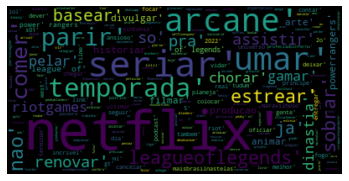

In [56]:
# Criar a nuvem de palavras
wordcloud = WordCloud(stopwords = STOPWORDS,
                      collocations=True).generate(texto_nuvem)

#plotar a nuvem de palavras
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob

In [ ]:
def stem(text):
  # This function is used to stem the given sentence
  porter = PorterStemmer()
  token_words = word_tokenize(text)
  stem_sentence = []
  for word in token_words:
    stem_sentence.append(porter.stem(word))
  return " ".join(stem_sentence)

In [ ]:
stem(texto_nuvem)

In [ ]:
def sentiment(cleaned_text):
  # Returns the sentiment based on the polarity of the input TextBlob object
  if cleaned_text.sentiment.polarity > 0:
    return 'positive'
  elif cleaned_text.sentiment.polarity < 0:
    return 'negative'
  else:
    return 'neutral'

In [ ]:
result = sentiment(texto_nuvem)
res.append((txt, clean_txt, sent))
print(result)